In [84]:
import pandas as pd
import numpy as np

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train=pd.read_csv('titanic_train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train.groupby('Pclass',as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


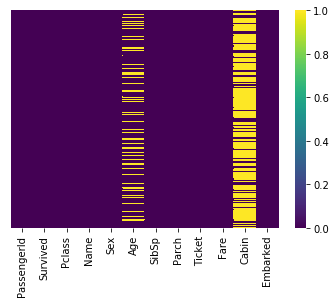

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis")

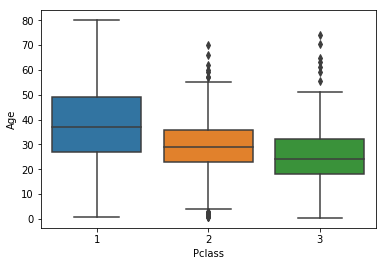

In [9]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [46]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 25
    else:
        return age

In [47]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

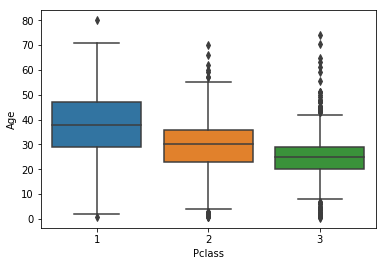

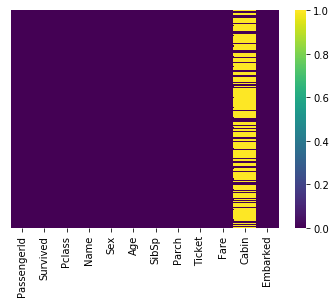

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis")

In [51]:
train.drop('Cabin',axis=1,inplace=True)

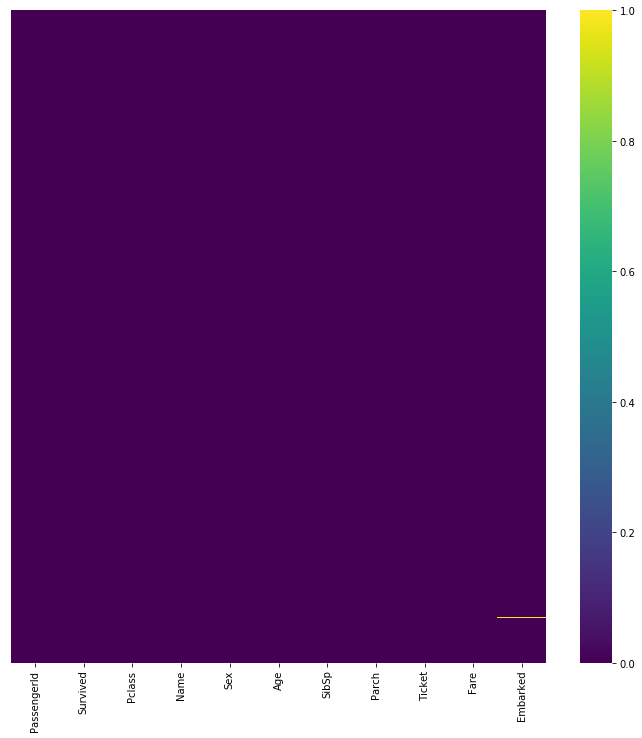

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis")

In [54]:
train.dropna(inplace=True)

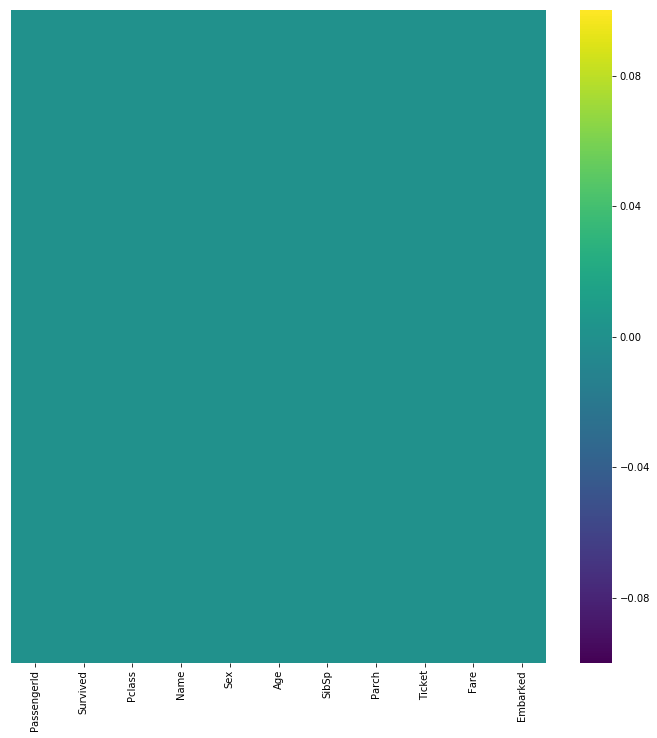

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis")

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [62]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [64]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [65]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [67]:
train = pd.concat([train,sex,embark,pclass],axis=1)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [69]:
train.drop('Pclass',axis=1,inplace=True)

In [72]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
Logmodel = LogisticRegression()

In [75]:
Logmodel.fit(X_train,y_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
test = pd.read_csv("titanic_test.csv")

In [94]:
test.groupby("Pclass",as_index=False)["Age"].mean()

,Pclass,Age
0,1,40.918367
1,2,28.777500
2,3,24.027945


In [95]:
def impute_age2(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 41
        elif pclass==2:
            return 28
        else:
            return 24
    else:
        return age

In [96]:
test['Age'] = test[['Age','Pclass']].apply(impute_age2,axis=1)

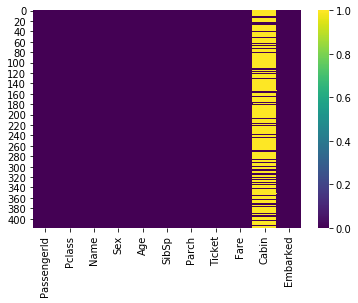

In [97]:
sns.heatmap(test.isnull(),cmap="viridis")

In [98]:
test.drop("Cabin",inplace=True,axis=1)

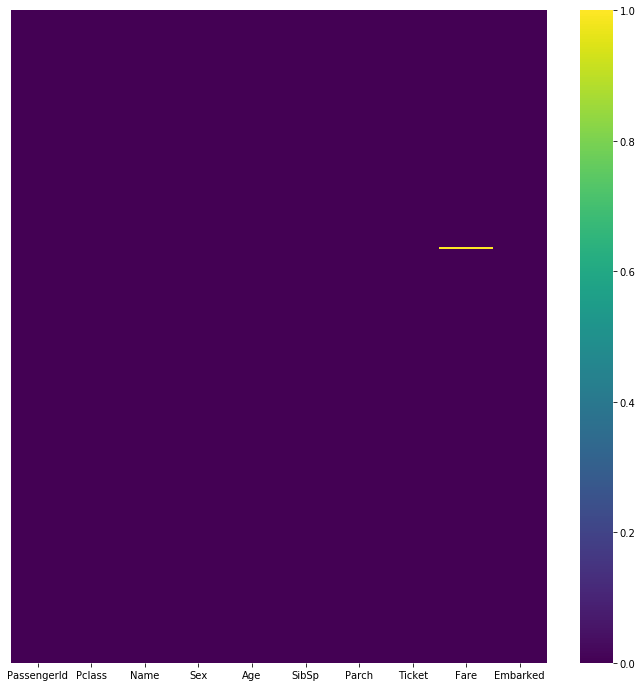

In [99]:
plt.figure(figsize=(12,12))
sns.heatmap(test.isnull(),yticklabels=False,cmap="viridis")

In [100]:
test.dropna(inplace=True)

In [101]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [106]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [107]:
pclass = pd.get_dummies(test['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [108]:
embark = pd.get_dummies(test['Embarked'],drop_first=True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [109]:
test.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [110]:
test = pd.concat([test,sex,embark,pclass],axis=1)

In [112]:
X_test = test
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,3,34.5,0,0,7.8292,1,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,1
2,894,2,62.0,0,0,9.6875,1,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,1


In [114]:
predictions=Logmodel.predict(X_test)

ValueError: X has 11 features per sample; expecting 10

In [115]:
X_train.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,22.0,1,0,7.2500,1,0,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,35.0,1,0,53.1000,0,0,1,0,0
4,5,35.0,0,0,8.0500,1,0,1,0,1


In [116]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,3,34.5,0,0,7.8292,1,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,1
2,894,2,62.0,0,0,9.6875,1,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,1


In [118]:
X_test.drop("Pclass",axis=1,inplace=True)


KeyError: "['Pclass'] not found in axis"

In [119]:
X_test.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [120]:
predictions = Logmodel.predict(X_test)

In [125]:
predictdf = pd.DataFrame(predictions,columns=['Survived'])
predictdf.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [126]:
results = pd.concat([X_test,predictdf],axis=1)

In [127]:
results.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3,Survived
0,892.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0.0,1.0,0.0
1,893.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,1.0,0.0
2,894.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,1.0,0.0,0.0
3,895.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,1.0,0.0
4,896.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,1.0
